In [4]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate 365 days of dates
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')

# Create a seasonal signal with noise
values = 10 + np.sin(np.linspace(0, 3 * np.pi, 365)) + np.random.normal(0, 0.8, 365)

# Inject a few anomalies (e.g., sudden spikes)
values[50] += 5
values[120] -= 4
values[300] += 6

# Create DataFrame
data = pd.DataFrame({'date': dates, 'value': values})

# Save dataset as CSV
data.to_csv('sample_timeseries.csv', index=False)

print("Saved as 'sample_timeseries.csv' in your current directory.")


Saved as 'sample_timeseries.csv' in your current directory.


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the synthetic time series data
df = pd.read_csv('sample_timeseries.csv', parse_dates=['date'])

# Create lag features for supervised learning
df['lag1'] = df['value'].shift(1)  # Yesterday's value
df['lag2'] = df['value'].shift(2)  # Value from two days ago

# Remove rows with missing values (due to shifting)
df = df.dropna()

# Use the last 30 days as a test set
train = df.iloc[:-30]
test = df.iloc[-30:]

# Prepare features and targets
X_train = train[['lag1', 'lag2']]
y_train = train['value']
X_test = test[['lag1', 'lag2']]
y_test = test['value']

# Initialize and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
preds = model.predict(X_test)

# Calculate RMSE for evaluation
rmse = mean_squared_error(y_test, preds, squared=False)
print(f'Forecasting RMSE: {rmse:.2f}')

# Save predictions for later visualization
test_result = test.copy()
test_result['prediction'] = preds
test_result.to_csv('forecast_results.csv', index=False)


Forecasting RMSE: 0.67


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sample_timeseries.csv')

# Calculate mean and standard deviation of the value
mean = df['value'].mean()
std = df['value'].std()

# Compute the z-score for each value
df['zscore'] = (df['value'] - mean) / std

# Flag anomalies where absolute z-score > 2 (customizable threshold)
df['anomaly'] = df['zscore'].abs() > 2

# Print the number of anomalies detected
print(f"Anomalies detected: {df['anomaly'].sum()}")

# Save anomaly results for visualization
df.to_csv('with_anomalies.csv', index=False)


Anomalies detected: 8


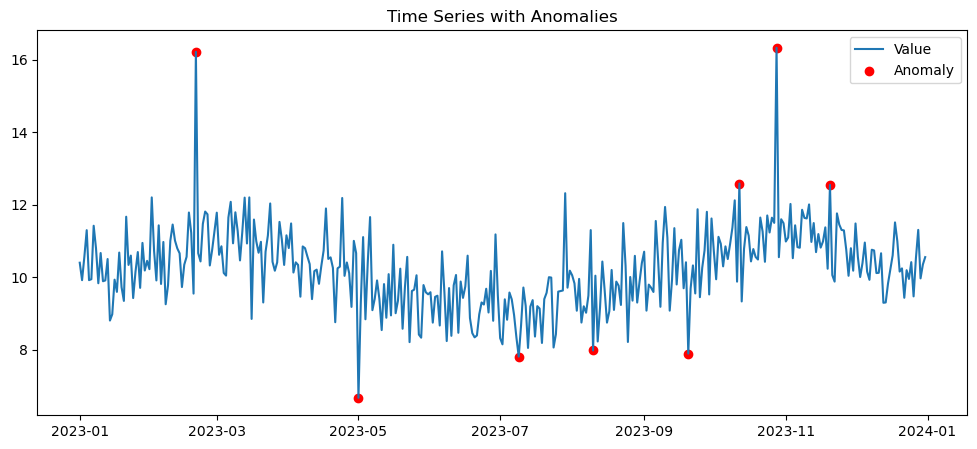

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results with anomalies
df = pd.read_csv('with_anomalies.csv', parse_dates=['date'])

# Plot the values and highlight anomalies
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['value'], label='Value')
plt.scatter(df[df['anomaly']]['date'], df[df['anomaly']]['value'], color='red', label='Anomaly')
plt.title('Time Series with Anomalies')
plt.legend()
plt.show()
